In [1]:
%matplotlib inline 
import numpy as np
import xray
from xray import ufuncs
import os
import math 
import gc 
import pandas as pd 
import matplotlib.pyplot as plt

lat = 48.03125
lon = -121.28125

## load the data using xray

direc = '/raid/gergel/dfm_ui_metdata' 
file = "fm100_1981.nc" 
ds = xray.open_dataset(os.path.join(direc,file)) 

file2 = "fm100_1982.nc" 
ds2 = xray.open_dataset(os.path.join(direc,file2)) 

In [4]:
## concatenate netcdf files 
ds_full = xray.concat([ds, ds2], dim='day')

In [ ]:
## look at the data (and get variable names)
ds_full 

(array([  1.18712080e+07,   6.16603890e+07,   1.42886280e+08,
          1.11354471e+08,   2.11614960e+07,   3.02816100e+06,
          9.00652000e+05,   2.93914000e+05,   6.98920000e+04,
          5.20700000e+03]),
 array([  1.94036674,   6.84949856,  11.75863037,  16.66776218,
         21.576894  ,  26.48602581,  31.39515762,  36.30428944,
         41.21342125,  46.12255306,  51.03168488]),
 <a list of 10 Patch objects>)

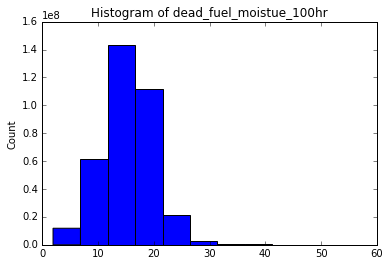

In [6]:
ds_full['dead_fuel_moistue_100hr'].plot() ## need to include the variable that you want to look at in the brackets

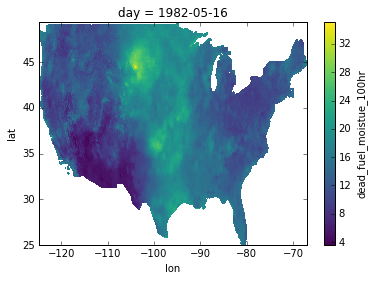

In [11]:
## spatial plot of time point (and day should be the name of the time dimension)
ds_full['dead_fuel_moistue_100hr'].isel(day=500).plot() 

saving figure to '/raid9/gergel/agg_snowpack/dfm_metdata'


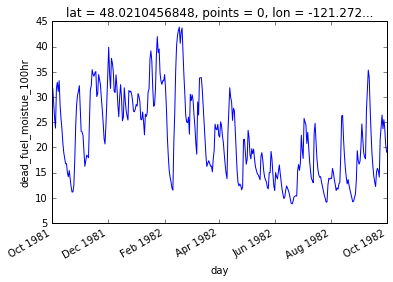

In [16]:
lon_ind = np.argmin(np.abs(ds.lon - lon))
lat_ind = np.argmin(np.abs(ds.lat - lat))

dfm = ds_full.isel_points(lon=[lon_ind],lat=[lat_ind])
dfm_sel = dfm.sel(day=slice('1981-10-01', '1982-10-01'))
dfm_sel['dead_fuel_moistue_100hr'].plot()

## save plot
direc = '/raid9/gergel/agg_snowpack/'
plotname = 'dfm_metdata' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)

saving figure to '/raid9/gergel/agg_snowpack/dfm_metdata'


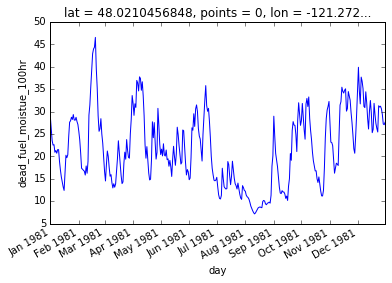

In [15]:
lon_ind = np.argmin(np.abs(ds.lon - lon))
lat_ind = np.argmin(np.abs(ds.lat - lat))

dfm = ds.isel_points(lon=[lon_ind],lat=[lat_ind])
dfm_sel = dfm.sel(day=slice('1981-01-01', '1981-12-31'))
dfm_sel['dead_fuel_moistue_100hr'].plot()
ds

## save plot
direc = '/raid9/gergel/agg_snowpack/'
plotname = 'dfm_metdata' 
savepath = os.path.join(direc, plotname)
print ("saving figure to '%s'" % savepath)
plt.savefig(savepath)
